<a href="https://colab.research.google.com/github/leejineun/ai-class/blob/main/3_Keras_%EC%88%98%EC%97%85_%EC%99%84%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras
- 파이썬으로 작성된 고수준 API
- 사용자 친화성
    - 일관성 있는 API
    - 자주 쓰는 모듈에 대한 액션 최소화 및 친절한 에러 피드백
- 모듈성
    - 레이어, 손실 함수 등 독립적인 모듈로 구성
- 쉬운 확장성
    - 쉬운 모듈의 추가
- 파이썬과의 호환

### Import

In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
keras.layers.Dense(10, activation='relu')

In [ ]:
tf.keras.layers.Dense(10, activation='relu')

In [ ]:
keras.Model()

In [ ]:
keras.models.Sequential()

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [ ]:
# tf.keras.layers.Dense(10, activation='relu')
Dense(10, activation='relu')

In [ ]:
# tf.keras.Model()
Model()

In [ ]:
#tf.keras.models.Sequential()
Sequential()

### 레이어들

### Dense
- Fully-connected Layer
- 노드 수, 활성화 함수 등을 지정
- name을 통한 레이어간 구분 가능
- kernel_initializer -> 레이어 내의 tf.Variable 초기값 지정


In [ ]:
dense = Dense(10, activation='relu', name='Dense Layer', kernel_initializer='glorot_uniform')

In [ ]:
dense

In [ ]:
dense_with_more_unit = Dense(15, activation='softmax')

In [ ]:
dense_with_more_unit

### Activation


In [ ]:
dense = Dense(10, name='Dense Layer', kernel_initializer='glorot_uniform')
dense = Activation(dense)
dense

### Flatten
- 배치 크기를 제외하고 데이터를 1차원으로 펴는 작업
- (128, 2, 2, 2) -> (128, 8)

In [ ]:
Flatten(input_shape=(128, 2, 2, 2))

### Input
- 모델의 입력을 정의
- shape, dtype을 포함
- 하나의 모델은 여러 개의 입력을 가질 수 있음

In [ ]:
input_1 = Input(shape=(28, 28))
input_2 = Input(shape=(8,), dtype=tf.float16)

In [ ]:
print(input_1, input_2)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'") KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float16, name='input_3'), name='input_3', description="created by layer 'input_3'")


### Conv2D
- 합성곱 연산

In [ ]:
img_1 = tf.random.uniform((1, 28, 28, 3), 0, 256, dtype=tf.int32)

In [ ]:
y = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=img_1.shape[1:])(tf.cast(img_1, tf.float32))
print(y.shape)

(1, 26, 26, 32)


In [ ]:
y = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=img_1.shape[1:])(tf.cast(img_1, tf.float32))
print(y.shape)

(1, 28, 28, 32)


###  모델 구성 방법
- ``Sequential()``
- 서브클래싱
- 함수형 api

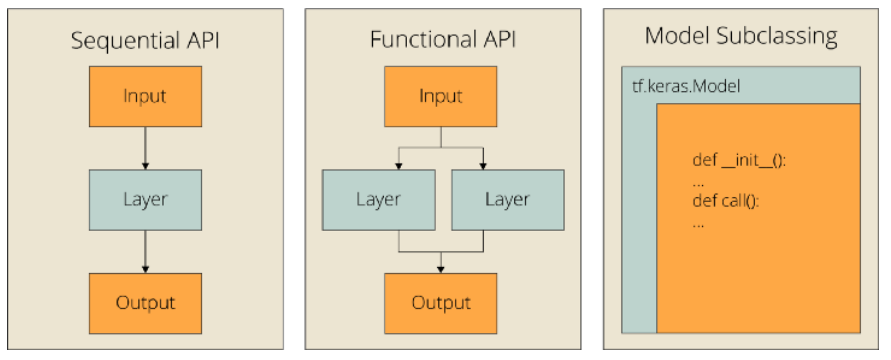

<출처 : https://wikidocs.net/106897 >

### Sequential
- 모델이 순차적으로 진행할 떄 사용
- 간단한 방법
  - Sequential 객체 생성 후, add를 통한 방법
  - Sequential 인자에 한 번에 추가
- 복잡한 모델 구현 불가

In [ ]:
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model # 모델을 시각화 해준다

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(32,32)))
model.add(Dense(300, activation='relu', name='Dense_1'))
model.add(Dense(100, activation='relu', name='Dense_2'))
model.add(Dense(10, activation='softmax', name='Dense_3'))

### 모델 구조 확인

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 32, 300)           9900      
_________________________________________________________________
Dense_2 (Dense)              (None, 32, 100)           30100     
_________________________________________________________________
Dense_3 (Dense)              (None, 32, 10)            1010      
Total params: 41,010
Trainable params: 41,010
Non-trainable params: 0
_________________________________________________________________


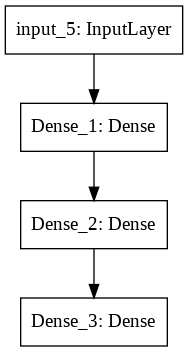

In [ ]:
plot_model(model)

In [ ]:
model = Sequential([
                    InputLayer(input_shape=(32, 32), name='input'),
                    Dense(300, activation='relu', name='Dense_1'),
                    Dense(100, activation='relu', name='Dense_2'),
                    Dense(10, activation='softmax', name='output')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 32, 300)           9900      
_________________________________________________________________
Dense_2 (Dense)              (None, 32, 100)           30100     
_________________________________________________________________
output (Dense)               (None, 32, 10)            1010      
Total params: 41,010
Trainable params: 41,010
Non-trainable params: 0
_________________________________________________________________


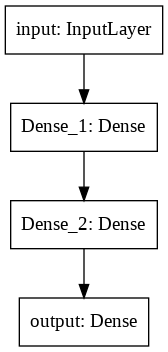

In [ ]:
plot_model(model)

In [ ]:
model = Sequential([
                    InputLayer(input_shape=(32, 32), name='input'),
                    # InputLayer(input_shape=(32, 32)),
                    Dense(300, activation='relu', name='Dense_1'),
                    Dense(100, activation='relu', name='Dense_2'),
                    Dense(10, activation='softmax', name='output')
])

### Functional
- 권장
- 모델을 복잡하고, 유연하게 구성 가능
- 다중 입출력 가능
- 대부분의 딥러닝 모델은 함수형 api급에서 구현 가능

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [ ]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs=inputs, outputs=x)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


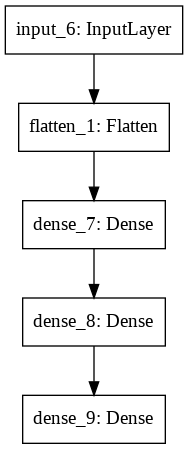

In [ ]:
plot_model(model)

In [ ]:
# 다중 입력
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden_1 = Dense(100, activation='relu')(input_layer)
hidden_2 = Dense(30, activation='relu')(hidden_1)
concat = Concatenate()([input_layer, hidden_2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])

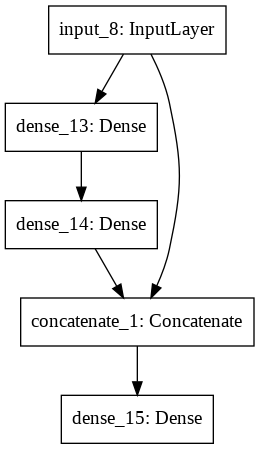

In [ ]:
plot_model(model)

In [ ]:
input_1 = Input(shape=(10, 10), name='input_1')
input_2 = Input(shape=(10, 28), name='input_2')

hidden_1 = Dense(100, activation='relu')(input_2)
hidden_2 = Dense(100, activation='relu')(hidden_1)
concat = Concatenate()([input_1, hidden_2])

output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])


In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 100)      10100       dense_16[0][0]                   
____________________________________________________________________________________________

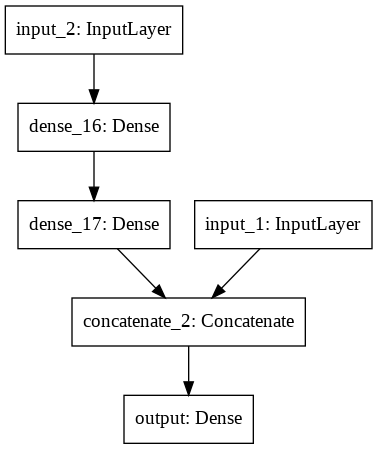

In [ ]:
plot_model(model, to_file='./test.png')

In [ ]:
# 다중 출력
input_1 = Input(shape=(10, 10), name='input_1')

hidden_1 = Dense(100, activation='relu')(input_1)
hidden_2 = Dense(10, activation='relu')(hidden_1)

output_1 = Dense(1, activation='sigmoid', name='output_1')(hidden_2)
output_2 = Dense(1, name='output_2')(hidden_2)

model = Model(inputs=[input_1], outputs=[output_1, output_2])

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 10, 100)      1100        input_1[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 10, 10)       1010        dense_20[0][0]                   
__________________________________________________________________________________________________
output_1 (Dense)                (None, 10, 1)        11          dense_21[0][0]                   
____________________________________________________________________________________________

In [ ]:
# 다중 출력
input_1 = Input(shape=(10, 10), name='input_1')
input_2 = Input(shape=(10, 10), name='input_2')

hidden_1 = Dense(100, activation='relu')(input_1)
hidden_2 = Dense(10, activation='relu')(hidden_1)

concat = Concatenate()([input_2, hidden_2])

output_1 = Dense(1, activation='sigmoid', name='output_1')(concat)
output_2 = Dense(1, name='output_2')(hidden_2)

model = Model(inputs=[input_1, input_2], outputs=[output_1, output_2])

In [ ]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 10, 100)      1100        input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 10, 10)       1010        dense_26[0][0]                   
____________________________________________________________________________________________

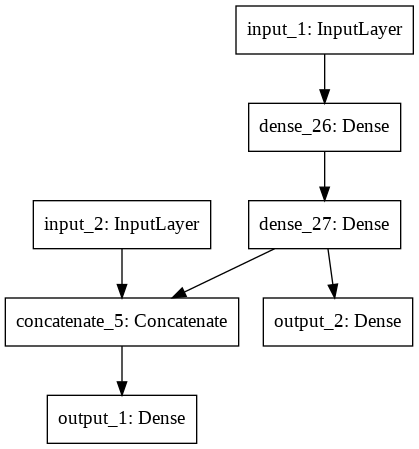

In [ ]:
plot_model(model)

In [ ]:
# # 다중 출력
# input_1 = Input(shape=(10, 10), name='input_1')
# input_2 = Input(shape=(10, 10), name='input_2')

# hidden_1 = Dense(100, activation='relu')(input_1)
# hidden_2 = Dense(10, activation='relu')(hidden_1)

# # concat = Concatenate()([input_2, hidden_2])

# output_1 = Dense(1, activation='sigmoid', name='output_1')(hidden_2)
# output_2 = Dense(1, name='output_2')(input_2)

# model = Model(inputs=[input_1, input_2], outputs=[output_1, output_2])

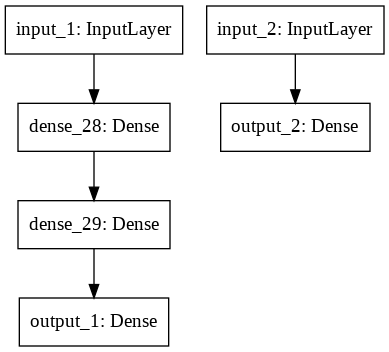

In [ ]:
# plot_model(model)

### Subclassing
- 높은 코드 난이도
- 모델이 클래스를 상속받아 커스터마이징 가능
- 주로 call() 메소드 안에서 원하는 계산
- 연구자급에서 주로 사용

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [ ]:
class LinearRegression(tf.keras.Model) : 
    def __init__(self) : 
        super(LinearRegression, self).__init__()
        self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

    def call(self, x) : 
        y_pred = self.linear_layer(x)

        return y_pred

### 가중치 확인

In [ ]:
input_1 = Input(shape=(28,28,1))

x = Flatten(input_shape=(28, 28, 1))(input_1)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_1, outputs=x)

In [ ]:
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_43 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 101       
Total params: 265,701
Trainable params: 265,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[2].name

'dense_42'

In [ ]:
model.get_layer('dense_42')

In [ ]:
weights, biases = model.layers[2].get_weights()
print(weights.shape, biases.shape)

(784, 300) (300,)


### Model Compile

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

**loss**
- sparse_categorical_crossentropy
    - 클래스가 배타적, MNIST의 손글씨 예제처럼 0~9와 같은 방식으로 구분이 되어 있을 때 사용
- categorical_cross_entropy
    - 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용
- binary_crossentropy
    - 이진 분류를 수행할 때 사용

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

### 모델 만들어 보기

In [ ]:
from sklearn.datasets import load_boston
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
transform_array = scaler.transform(df)

In [ ]:
df = pd.DataFrame(transform_array, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, boston.target, test_size=0.2, random_state=42)

In [ ]:
# 데이터 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
# Sequential을 사용해서, Dense가 4개인 신경망을 만들어보세요. Activation = relu, input_shape=(13,)

model = Sequential([
    # InputLayer(input_shape=(13,)),
    Dense(100, activation='relu', input_shape=(13,), name='Dense_1'),
    Dense(64, activation='relu', name='Dense_2'),
    Dense(32, activation='relu', name='Dense_3'),
    # 마지막 출력층                
    Dense(1, name='output')
])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
Dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
Dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


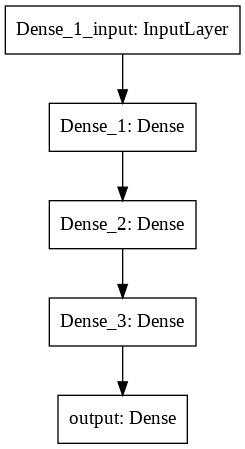

In [ ]:
plot_model(model)

In [ ]:
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.01),
              metrics=['mae']
              )

In [ ]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 2ms/step - loss: 241.1202 - mae: 12.0617
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 50.1188 - mae: 5.2835
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 25.2272 - mae: 3.7135
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 19.0843 - mae: 3.1631
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 15.9671 - mae: 2.8085
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 12.4842 - mae: 2.5312
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 11.8168 - mae: 2.4961
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 11.9020 - mae: 2.4209
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 10.9178 - mae: 2.4755
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 10.2520 - mae: 2.3268
Epoch 11/200
13/13 [===========================

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 12.3979 - mae: 2.3425


[12.39792251586914, 2.342480421066284]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae'])


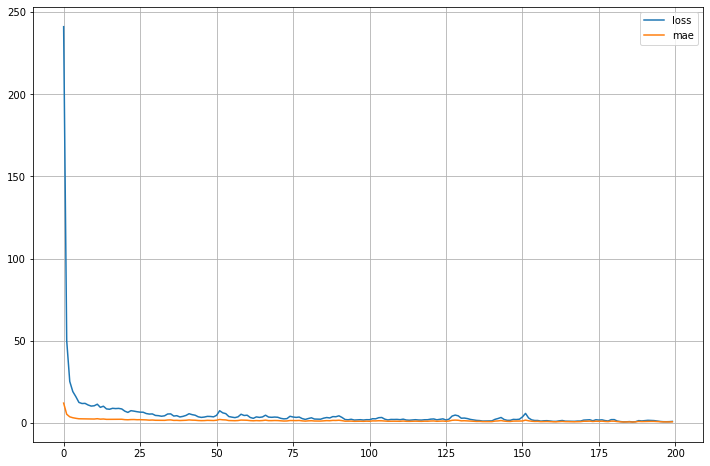

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.legend(['loss', 'mae'])
plt.grid()
plt.show()

In [ ]:
#KFold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
k = 3
kfold = KFold(n_splits=k, random_state=42)

In [ ]:
def my_model() : 
    input_1 = Input(shape=(13,), name='input')
    
    hidden_1 = Dense(100, activation='relu', name='dense_1')(input_1)
    hidden_2 = Dense(64, activation='relu', name='dense_2')(hidden_1)
    hidden_3 = Dense(32, activation='relu', name='dense_3')(hidden_2)

    output = Dense(1, name='output')(hidden_3)

    model = Model(inputs=[input_1], outputs=output)

    model.compile(loss='mse', optimizer='adam', metrics=['mae'])

    return model

In [ ]:
import sys
mod = sys.modules[__name__]

In [ ]:
mae_list = []

for i, (train_index, validation_index) in enumerate(kfold.split(X_train)) : 
    X_train_kfold, X_val_kfold = X_train.iloc[train_index], X_train.iloc[validation_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[validation_index]

    model = my_model()

    history = model.fit(X_train_kfold, y_train_kfold, epochs=300, validation_data=(X_val_kfold, y_val_kfold))
    setattr(mod, f'hist_{i}', model.fit(X_train_kfold, y_train_kfold, epochs=300, validation_data=(X_val_kfold, y_val_kfold)))

    _, test_mae = model.evaluate(X_test, y_test)

    mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 1s 24ms/step - loss: 576.2313 - mae: 22.1799 - val_loss: 572.3550 - val_mae: 21.9468
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 524.5289 - mae: 21.0093 - val_loss: 508.6420 - val_mae: 20.4684
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 448.7789 - mae: 19.1368 - val_loss: 412.1692 - val_mae: 18.0813
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 335.3493 - mae: 16.1578 - val_loss: 280.0571 - val_mae: 14.3256
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 197.5768 - mae: 11.7408 - val_loss: 146.0919 - val_mae: 9.7595
Epoch 6/300
9/9 [==============================] - 0s 7ms/step - loss: 97.8919 - mae: 7.9482 - val_loss: 90.6987 - val_mae: 7.6163
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 71.2712 - mae: 6.6032 - val_loss: 69.8116 - val_mae: 6.5813
Epoch 8/300
9/9 [==============================] - 0s 5ms/step 

In [ ]:
mae_list

[2.5000417232513428, 2.496601104736328, 2.9256417751312256]

In [ ]:
np.mean(mae_list)

2.6407615343729653

In [ ]:
df.iloc[2]

CRIM      -0.417342
ZN        -0.487722
INDUS     -0.593381
CHAS      -0.272599
NOX       -0.740262
RM         1.282714
AGE       -0.265812
DIS        0.557160
RAD       -0.867883
TAX       -0.987329
PTRATIO   -0.303094
B          0.396427
LSTAT     -1.208727
Name: 2, dtype: float64

In [ ]:
boston.target[2]

34.7

In [ ]:
model.predict(np.array(df.iloc[2]).reshape(-1, 13))

array([[31.686352]], dtype=float32)

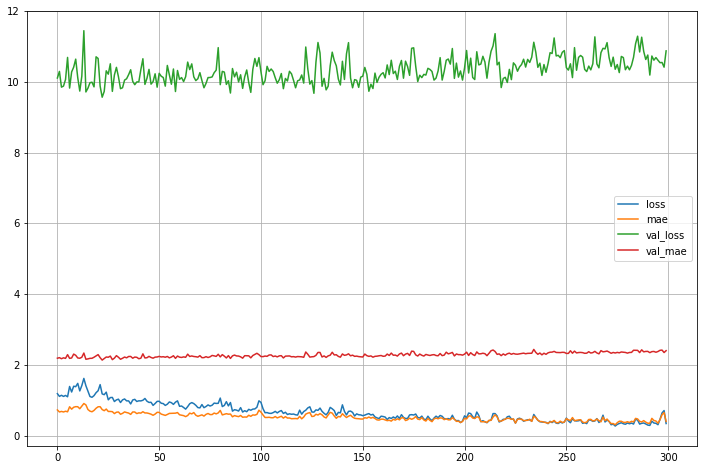

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist_0.history['loss'])
plt.plot(hist_0.history['mae'])
plt.plot(hist_0.history['val_loss'])
plt.plot(hist_0.history['val_mae'])
plt.legend(['loss', 'mae', 'val_loss', 'val_mae'])
plt.grid()
plt.show()